## Load librarys

In [19]:
install.packages('rcompanion')
install.packages('car')
install.packages('readr')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readr)


The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//RtmpOXS1ob/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//RtmpOXS1ob/downloaded_packages

The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//RtmpOXS1ob/downloaded_packages


## Load in Data

In [20]:
YouTubeChannels <- read_csv("/Users/kenyashiafernandez/Downloads/YouTubeChannels.csv")

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 5000 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Rank, Grade, Channel name, Subscribers
dbl (2): Video Uploads, Video views

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
head(YouTubeChannels)

Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1st,A++,Zee TV,82757,18752951,20869786591
2nd,A++,T-Series,12661,61196302,47548839843
3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
4th,A++,SET India,27323,31180559,22675948293
5th,A++,WWE,36756,32852346,26273668433
6th,A++,Movieclips,30243,17149705,16618094724


## Data Wrangling 

In [34]:
YouTubeChannels <- YouTubeChannels %>% 
  rename(Views = `Video views`)

In [35]:
YouTubeChannels$Views <- as.numeric(YouTubeChannels$Views)

## Normality

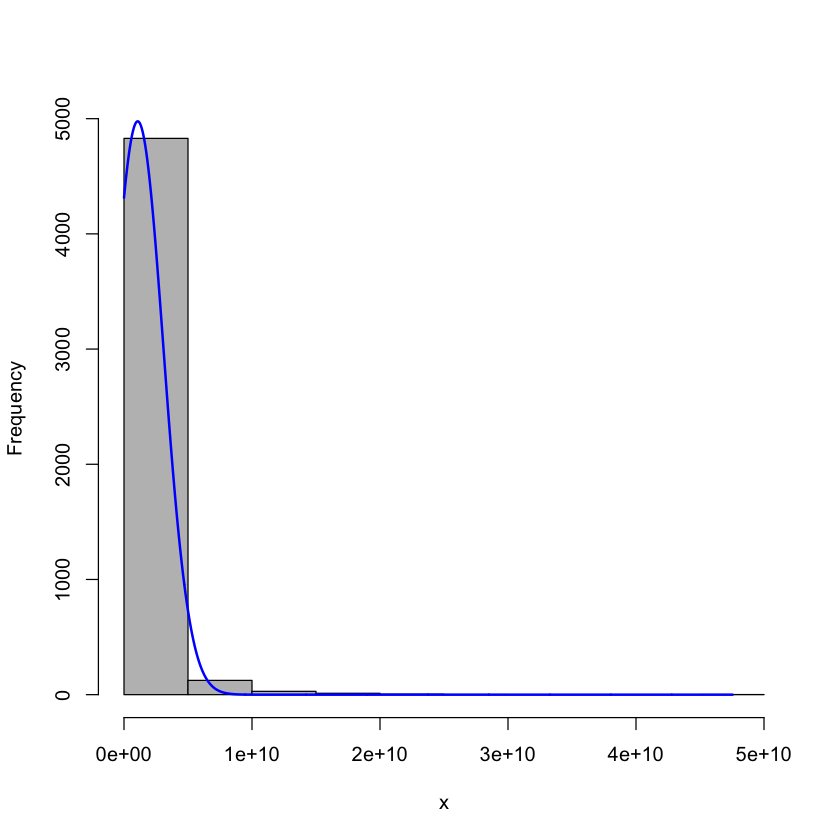

In [36]:
plotNormalHistogram(YouTubeChannels$Views)

## Square rt

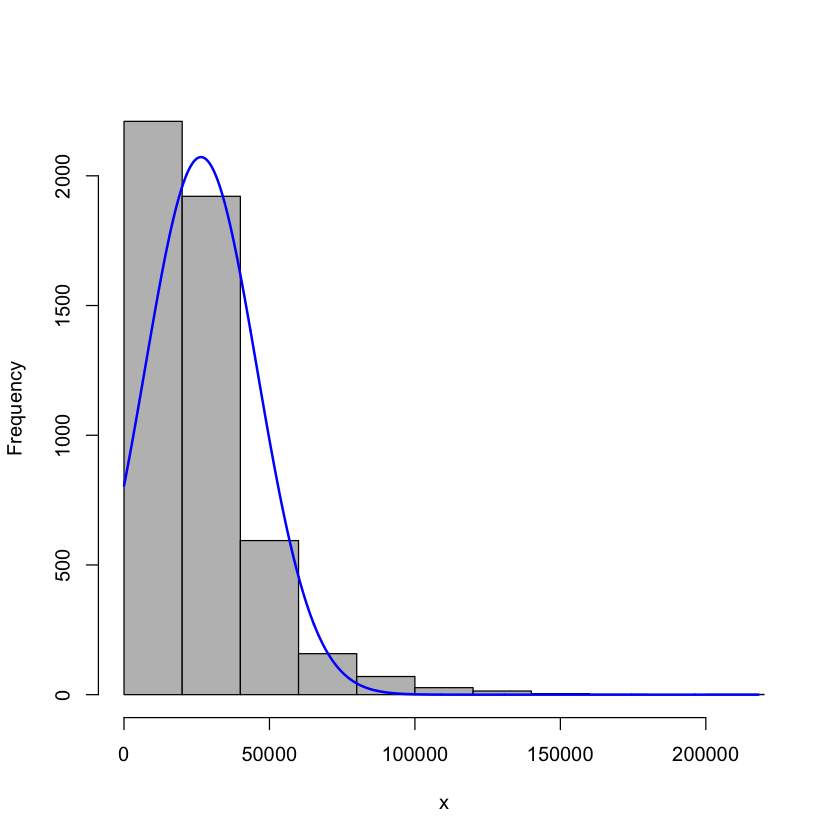

In [37]:
YouTubeChannels$ViewsSQRT <- sqrt(YouTubeChannels$Views)
plotNormalHistogram(YouTubeChannels$ViewsSQRT)


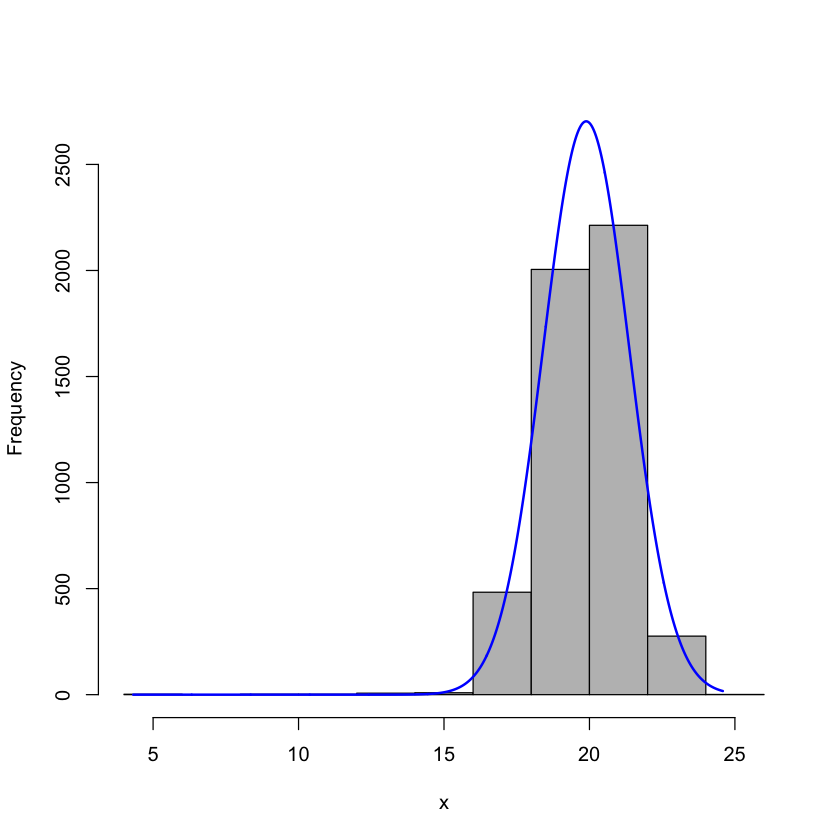

In [38]:
YouTubeChannels$ViewsLOG <- log(YouTubeChannels$Views)
plotNormalHistogram(YouTubeChannels$ViewsLOG)

## Homogeneity of Variance

In [39]:
bartlett.test(ViewsSQRT ~ Grade, data=YouTubeChannels)


	Bartlett test of homogeneity of variances

data:  ViewsSQRT by Grade
Bartlett's K-squared = 1107.1, df = 5, p-value < 2.2e-16


## Do the Test, with unequal variance

In [40]:
ANOVA1 <- lm(ViewsSQRT ~ Grade, data=YouTubeChannels)
Anova(ANOVA1, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Grade,5,215.9149,4.112783e-209
Residuals,4994,NA,NA


## Do the Post Hocs with unequal variance

In [41]:
pairwise.t.test(YouTubeChannels$ViewsSQRT, YouTubeChannels$Grade, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  YouTubeChannels$ViewsSQRT and YouTubeChannels$Grade 

            A       A-      A+      A++    
A   1.7e-05 -       -       -       -      
A-  0.00146 < 2e-16 -       -       -      
A+  8.9e-14 1.9e-05 2.2e-09 -       -      
A++ 6.8e-05 0.00084 0.00029 0.00874 -      
B+  0.03203 < 2e-16 < 2e-16 2.1e-11 0.00017

P value adjustment method: bonferroni 

## Find means and draw conclusions

In [43]:
YouTubeChannelsMeans <- YouTubeChannels %>% group_by(Grade) %>% summarize(Mean = mean(Views))